In [1]:
import pandas as pd


trace = pd.read_csv("acol_trace.txt", sep="\t")

which_variable = "species_log_nu"
which_number = which_variable + "_101"

In [2]:
print(trace[which_number].mean())
print(trace[which_number].var())

0.5
0.0


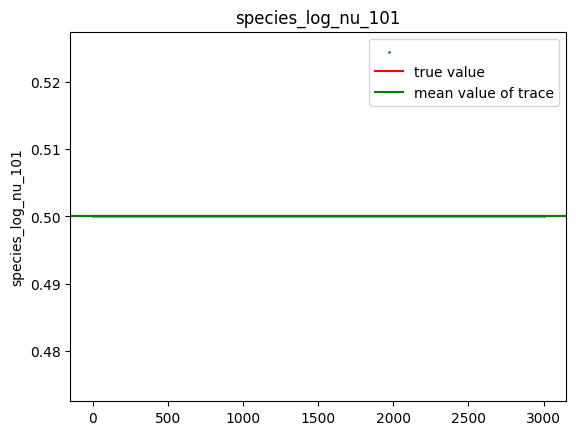

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=trace, y=which_number, x=range(len(trace)), s=5).set_title(
    which_number
)
plt.axhline(y=trace[which_number][0], color="red")
plt.axhline(y=trace[which_number].mean(), color="green")
plt.legend(["", "true value", "mean value of trace"])

In [4]:
species_alpha = [i for i in trace.columns if which_variable in i]

In [5]:
trace[which_number][0]

np.float64(0.5)

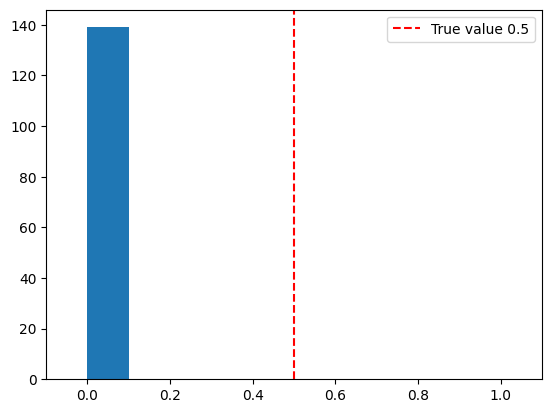

In [6]:
import matplotlib.pyplot as plt

alphas_smaller_than_true_alpha = (trace < trace[which_number][0])[
    species_alpha
].sum() / len(trace)

plt.hist(alphas_smaller_than_true_alpha)
plt.xlim(-0.1, 1.1)
plt.axvline(
    x=trace[which_number][0],
    color="red",
    linestyle="dashed",
    label=f"True value {trace[which_number][0]}",
)
plt.legend()

In [7]:
Z_state = pd.read_csv("../acol_simulated_Z_species.txt", sep="\t")

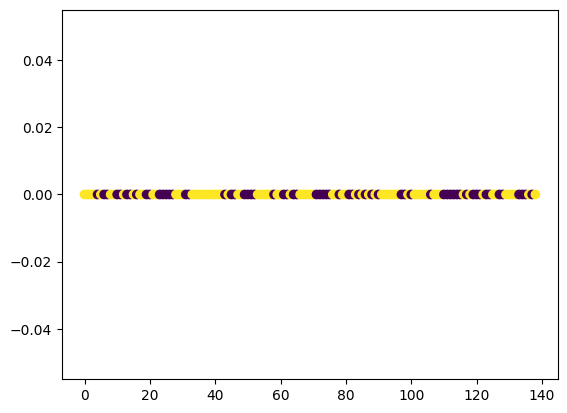

In [8]:
plt.scatter(
    x=range(len(alphas_smaller_than_true_alpha)),
    y=alphas_smaller_than_true_alpha,
    c=Z_state["Z_state"],
)